## Card 데이터 분석

---



In [ ]:
#card 데이터 이름 다시 설정 및 시간 정보 변경
card.rename(columns={'receipt_dttm':'date','adstrd_code':'행정동코드', 'brtc_nm':'sido', 'signgu_nm':'gu',
                      'adstrd_nm':'dong','mrhst_induty_cl_code':'induty_code','mrhst_induty_cl_nm':'induty_name',
                    'selng_cascnt':'cnt', 'salamt':'cost'}, inplace=True)
card['date']=pd.to_datetime(card['date'], format ='%Y%m%d')
card['행정동코드'] = card['행정동코드'].astype(int)
card.head()

,date,행정동코드,dong,induty_code,induty_name,cnt,cost
0,2020-01-04,1174066000,성내3동,7041,약국,463,5843230
1,2020-01-04,1174066000,성내3동,7022,치과의원,33,7835550
2,2020-01-04,1174066000,성내3동,7021,한의원,53,4589800
3,2020-01-04,1174066000,성내3동,7020,의원,339,9267240
4,2020-01-04,1174066000,성내3동,6110,자동차정비,19,4441000


코로나 발발 후, 가장 큰 변동을 맞은 분야 몇 개를 선정하여 데이터를 분석하였다. 각 분야마다 매출발생건수(cnt)가 크게 변한 부분의 사건을 검색하여 그 이유를 탐색해 보았다.


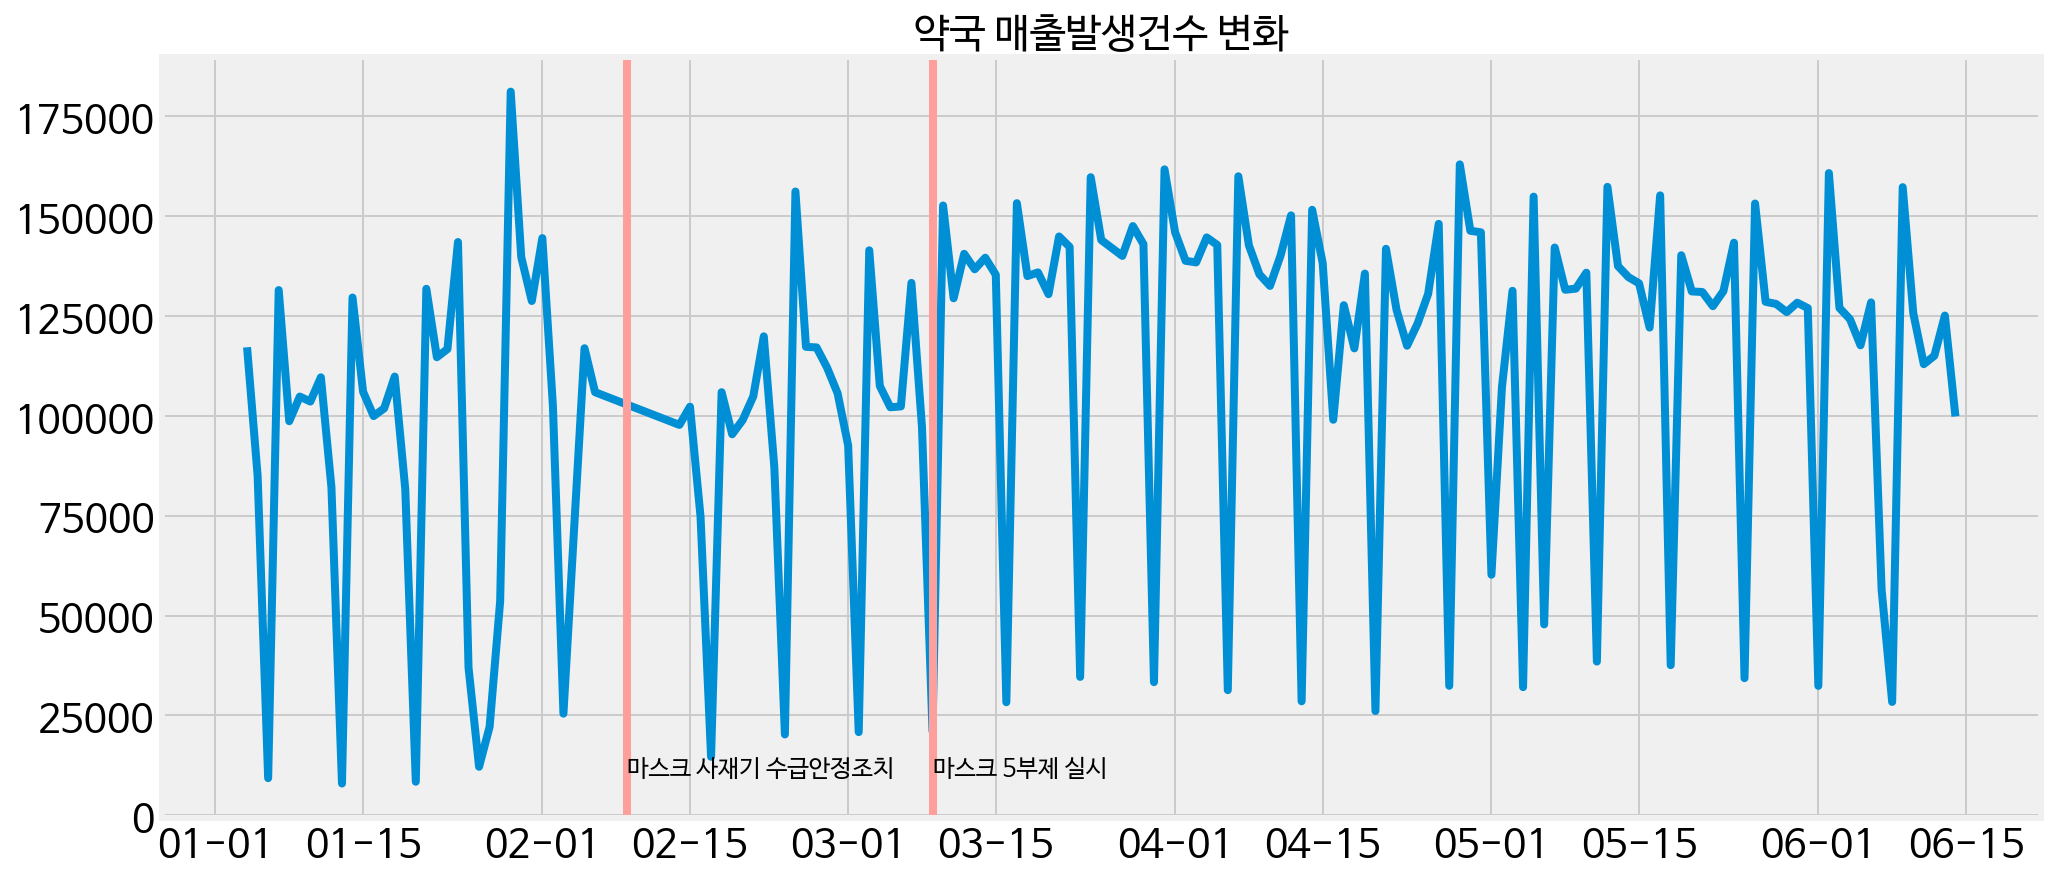

In [ ]:
#약국
card_drug=card.loc[card['induty_name']=="약국",:]
card_drug=card_drug[['date','cost','cnt']]
card_drug['cnt']=pd.to_numeric(card_drug['cnt'])
card_drug=card_drug.groupby('date')['cnt'].sum().to_frame().reset_index()

#그래프 그리기
plt.rcParams['figure.figsize'] = (15,7)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.xaxis.set_major_locator(mdates.AutoDateLocator(minticks = 12, maxticks = 14))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.title("약국 매출발생건수 변화", fontsize = 20)
plt.plot(card_drug['date'],card_drug['cnt'])
plt.axvline(datetime.datetime(2020,2,9), color='r')
plt.text(datetime.datetime(2020,2,9), 10000,'마스크 사재기 수급안정조치', fontsize=12)
plt.axvline(datetime.datetime(2020,3,9), color='r')
plt.text(datetime.datetime(2020,3,9), 10000, '마스크 5부제 실시', fontsize=12)
plt.show()

코로나 확진자가 처음으로 발생한 1월 20일 이후 마스크 및 약품 구매로 인해 약국의 cnt가 증가하는 모습을 보여주었으나, 마스크 공급안정이 되고, 마스크 5부제가 실시되어 cnt가 안정화 되는 것을 확인할 수 있다.

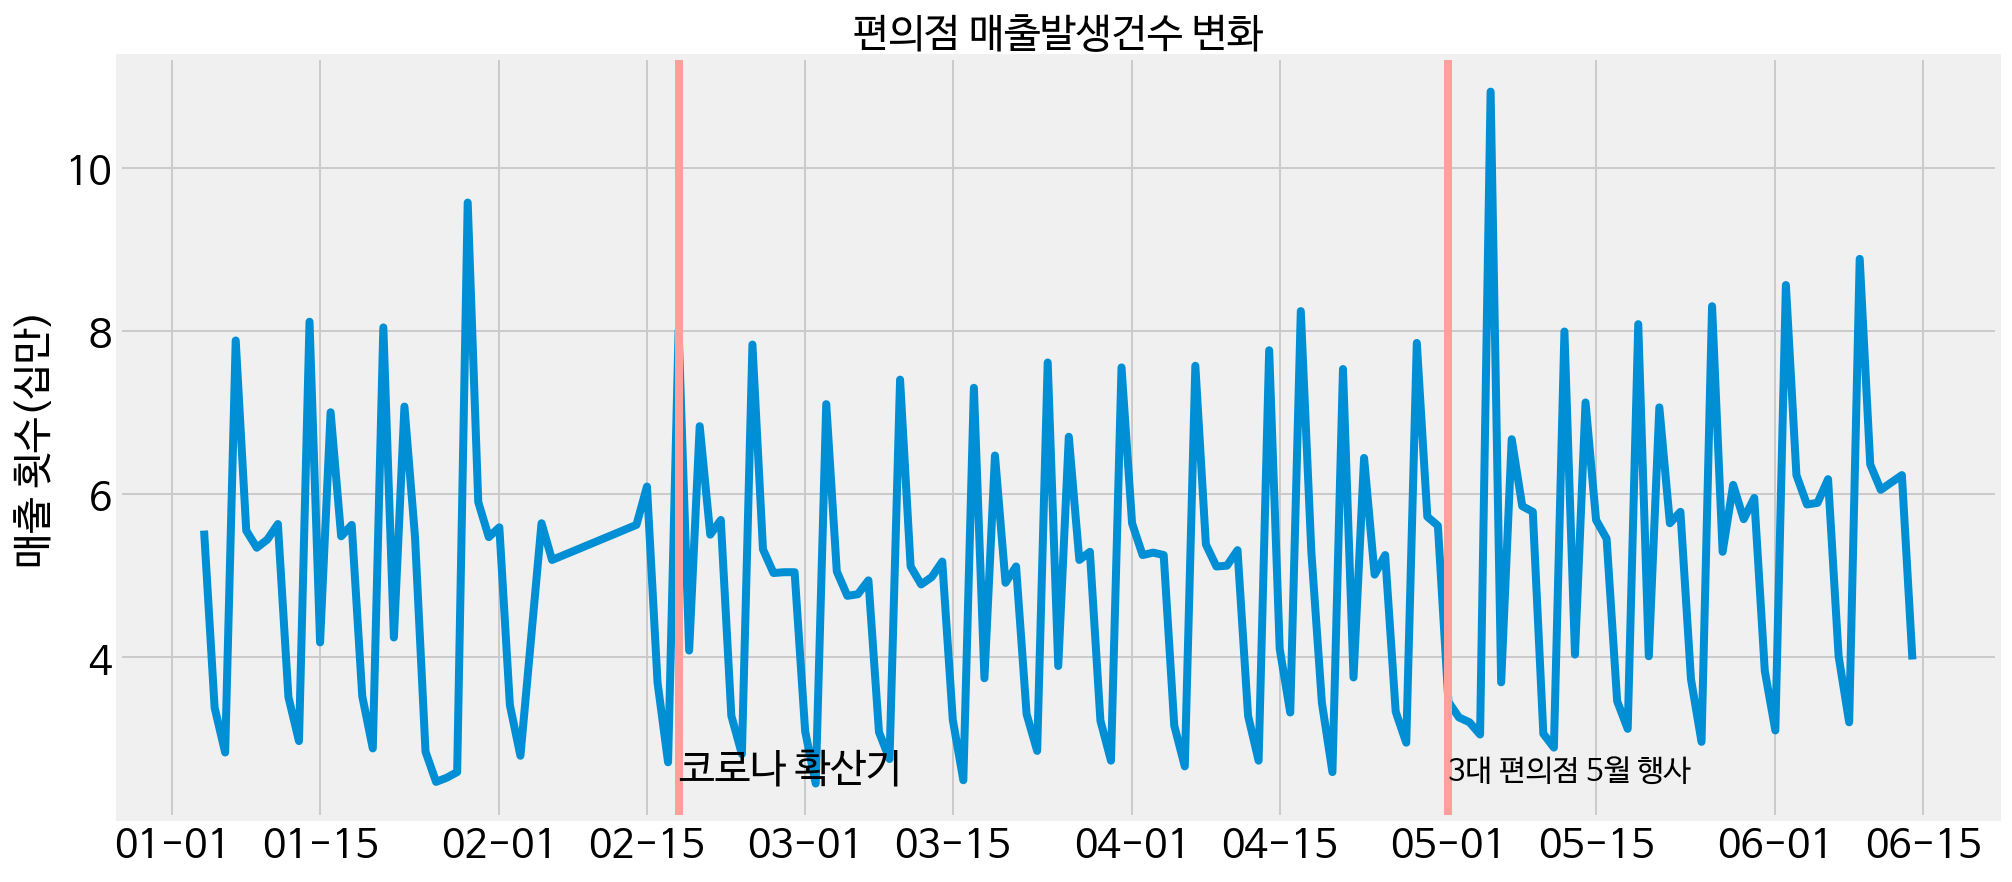

In [ ]:
#편의점
card_convin=card.loc[card['induty_name']=="편 의 점",:]
card_convin=card_convin[['date','cost','cnt']]
card_convin['cnt']=pd.to_numeric(card_convin['cnt'])

#편의점 결제 횟수가 너무 커 십만으로 나눈 뒤 상대값 정하기
card_convin=card_convin.groupby('date')['cnt'].sum().divide(100000).round(2).to_frame().reset_index()

#그래프 그리기
plt.rcParams['figure.figsize'] = (15,7)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.xaxis.set_major_locator(mdates.AutoDateLocator(minticks = 12, maxticks = 14))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.title("편의점 매출발생건수 변화",size = 20)
plt.plot(card_convin['date'],card_convin['cnt'])
plt.axvline(datetime.datetime(2020,2,18), color='r')
plt.text(datetime.datetime(2020,2,18), 2.5, '코로나 확산기', fontsize=20)
plt.axvline(datetime.datetime(2020,5,1), color='r')
plt.text(datetime.datetime(2020,5,1), 2.5,'3대 편의점 5월 행사', fontsize=15)
plt.ylabel('매출 횟수(십만)', size = 20)
plt.show()

### 유흥 및 문화산업 데이터 분석

---



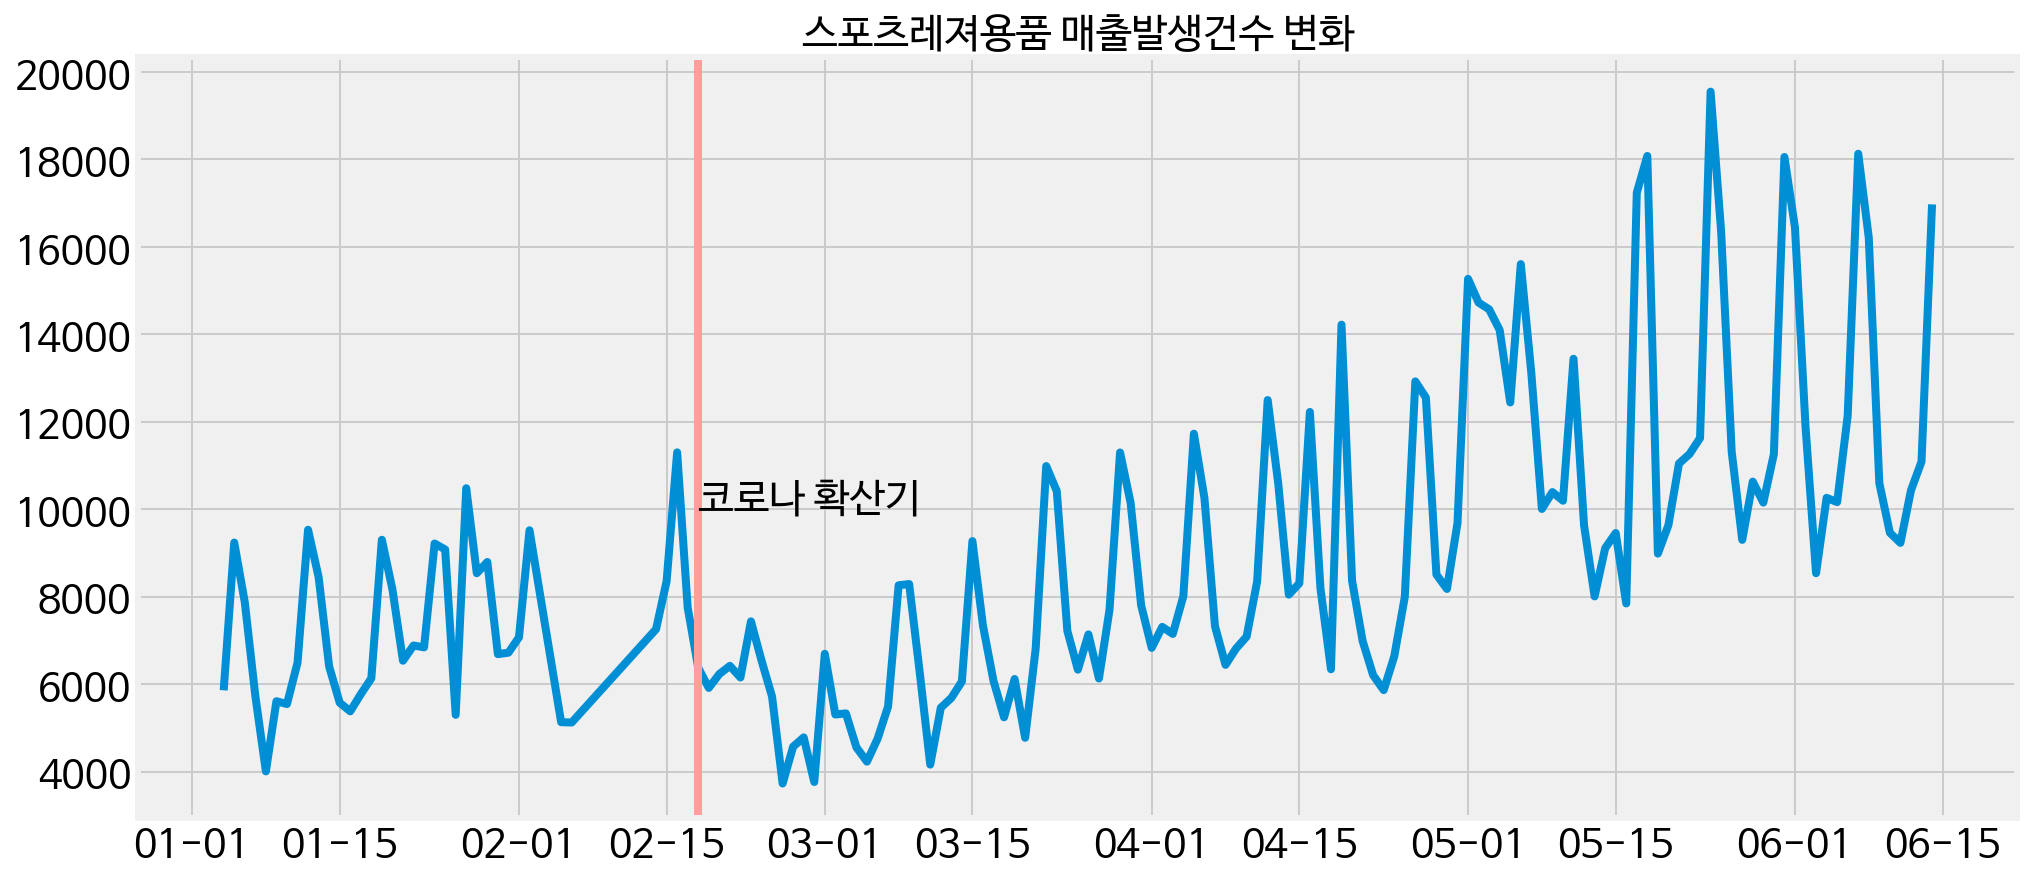

In [ ]:
#스포츠레져용품
card_sport=card.loc[card['induty_name']=="스포츠레져용품",:]
card_sport=card_sport[['date','cost','cnt']]
card_sport['cnt']=pd.to_numeric(card_sport['cnt'])
card_sport=card_sport.groupby('date')['cnt'].sum().to_frame().reset_index()

#그래프 그리기
plt.rcParams['figure.figsize'] = (15,7)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.xaxis.set_major_locator(mdates.AutoDateLocator(minticks = 12, maxticks = 14))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.title("스포츠레져용품 매출발생건수 변화", fontsize = 20)
plt.plot(card_sport['date'],card_sport['cnt'])
plt.axvline(datetime.datetime(2020,2,18), color='r')
plt.text(datetime.datetime(2020,2,18), 10000, '코로나 확산기', fontsize=20)
plt.show()

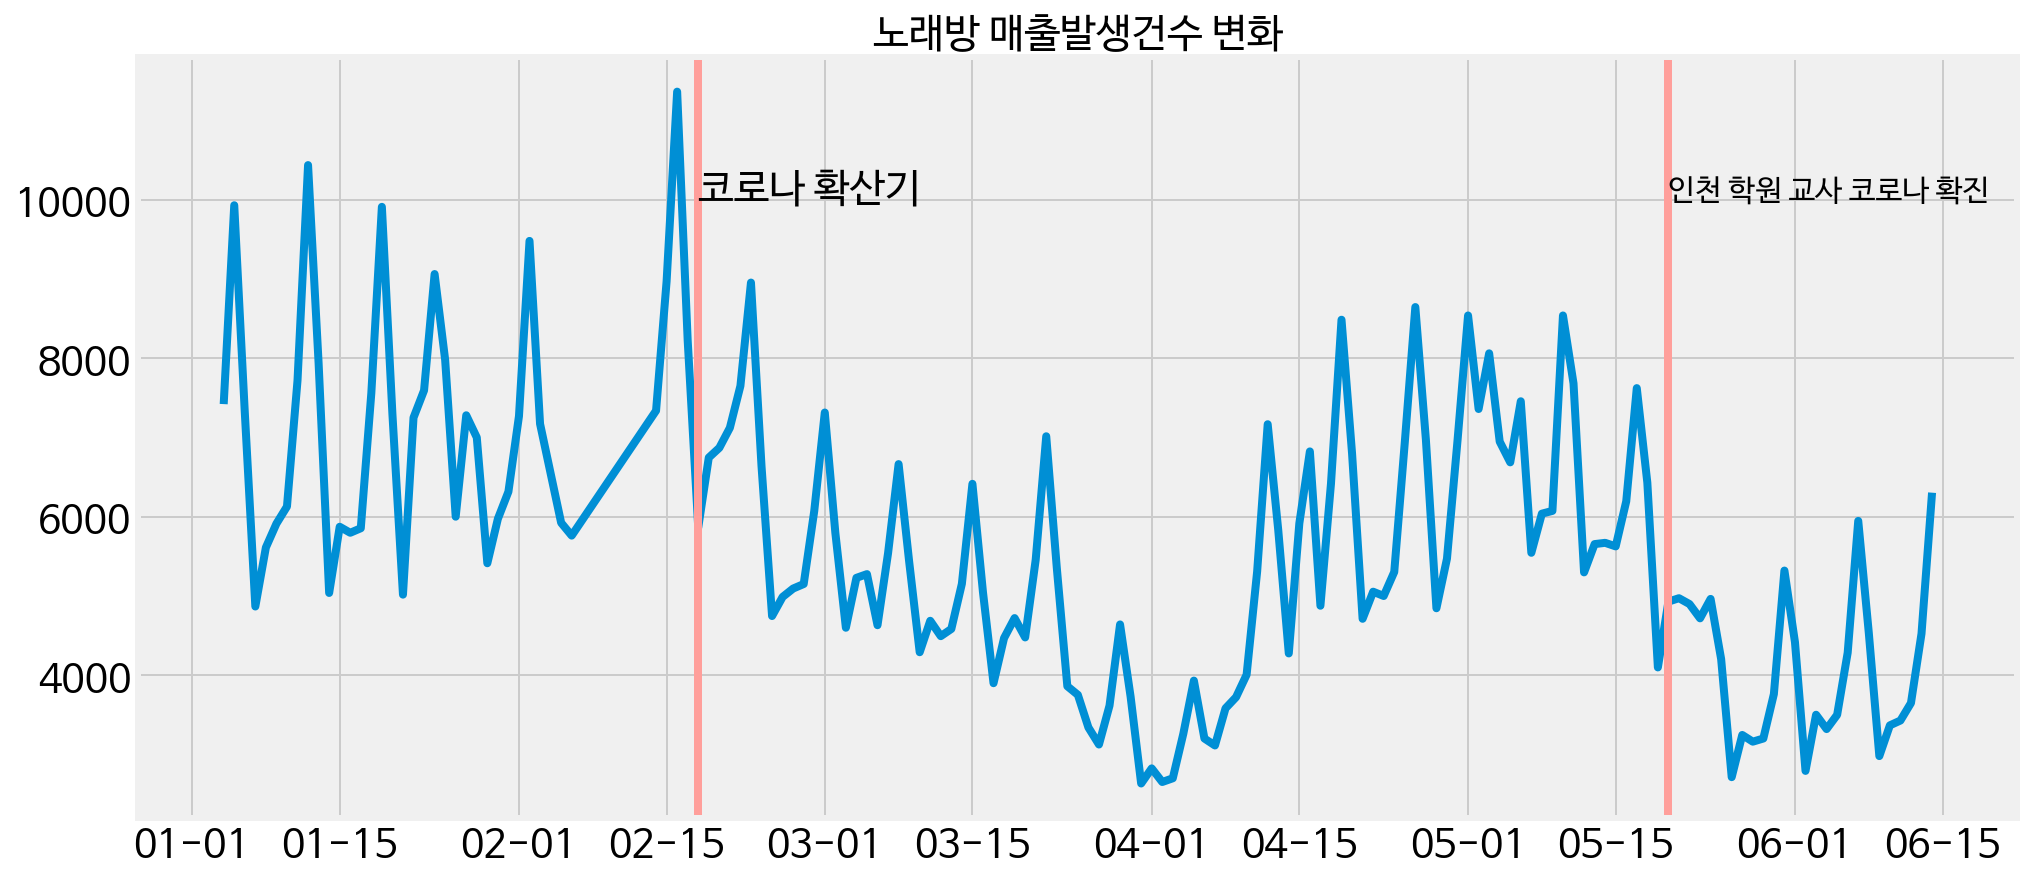

In [ ]:
#노래방
card_sing=card.loc[card['induty_name']=="노래방",:]
card_sing=card_sing[['date','cost','cnt']]
card_sing['cnt']=pd.to_numeric(card_sing['cnt'])
card_sing=card_sing.groupby('date')['cnt'].sum().to_frame().reset_index()

#그래프 그리기
plt.rcParams['figure.figsize'] = (15,7)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.xaxis.set_major_locator(mdates.AutoDateLocator(minticks = 12, maxticks = 14))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.title("노래방 매출발생건수 변화", fontsize = 20)
plt.plot(card_sing['date'],card_sing['cnt'])
plt.axvline(datetime.datetime(2020,2,18), color='r')
plt.text(datetime.datetime(2020,2,18), 10000, '코로나 확산기', fontsize=20)
plt.axvline(datetime.datetime(2020,5,20), color='r')
plt.text(datetime.datetime(2020,5,20), 10000, '인천 학원 교사 코로나 확진', fontsize=15)
plt.show()

Text(2020-02-18 00:00:00, 32500, '코로나 확산기')

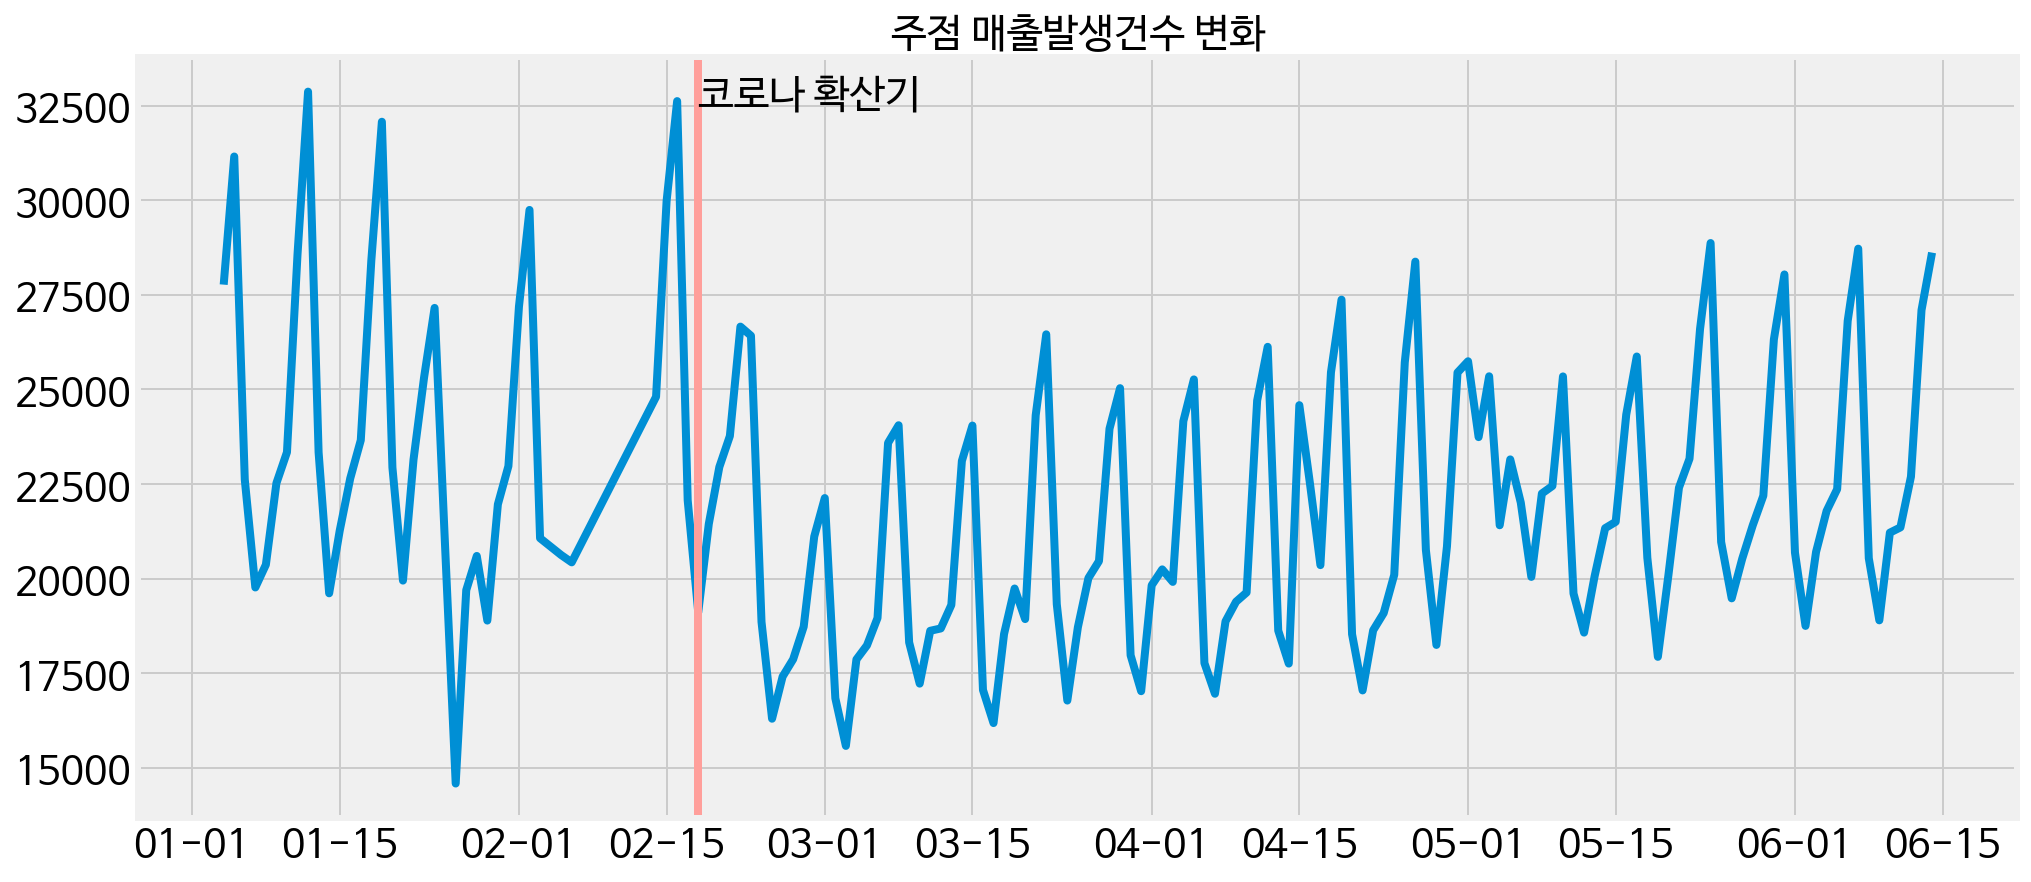

In [ ]:
#주점
card_alchol=card.loc[card['induty_name']=="주점",:]
card_alchol=card_alchol[['date','cost','cnt']]
card_alchol['cnt']=pd.to_numeric(card_alchol['cnt'])
card_alchol=card_alchol.groupby('date')['cnt'].sum().to_frame().reset_index()

#그래프 그리기
plt.rcParams['figure.figsize'] = (15,7)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.xaxis.set_major_locator(mdates.AutoDateLocator(minticks = 12, maxticks = 14))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.title("주점 매출발생건수 변화", fontsize = 20)
plt.plot(card_alchol['date'],card_alchol['cnt'])
plt.axvline(datetime.datetime(2020,2,18), color='r')
plt.text(datetime.datetime(2020,2,18), 32500, '코로나 확산기', fontsize=20)

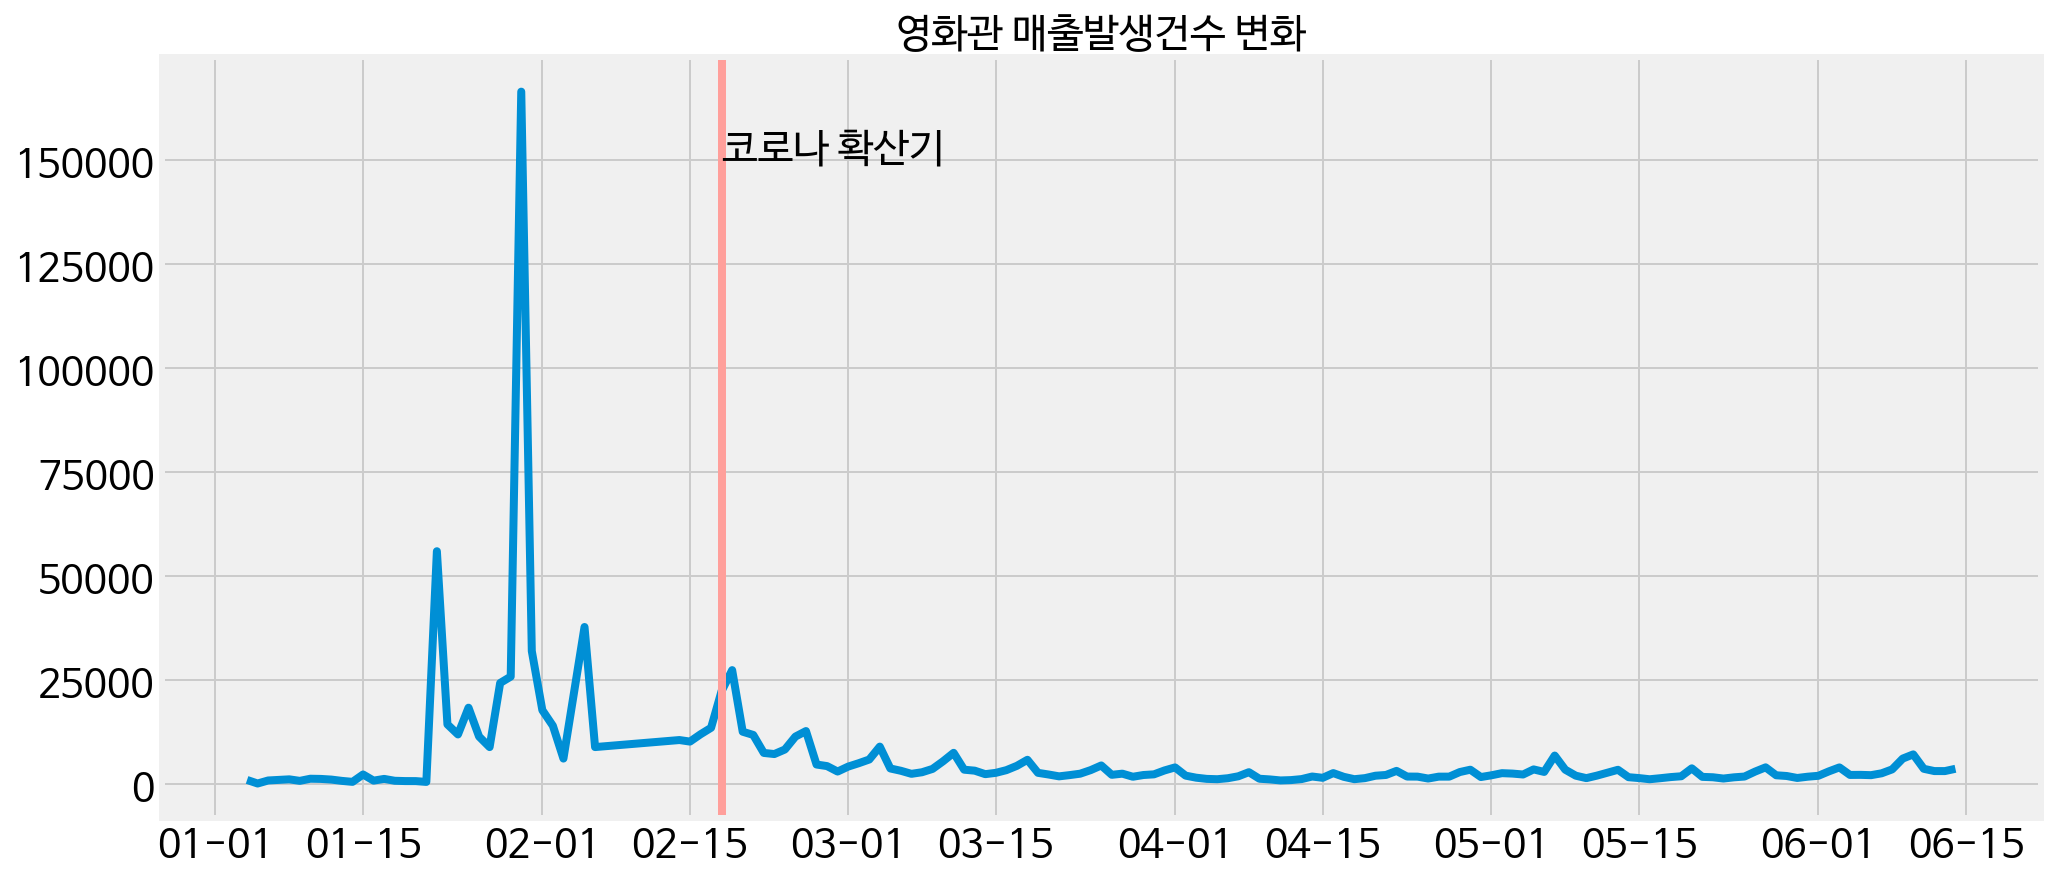

In [ ]:
#영화관
card_movie=card.loc[card['induty_name']=="영화관",:]
card_movie=card_movie[['date','cost','cnt']]
card_movie['cnt']=pd.to_numeric(card_movie['cnt'])
card_movie=card_movie.groupby('date')['cnt'].sum().to_frame().reset_index()

#그래프 그리기
plt.rcParams['figure.figsize'] = (15,7)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.xaxis.set_major_locator(mdates.AutoDateLocator(minticks = 12, maxticks = 14))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.title("영화관 매출발생건수 변화",fontsize = 20)
plt.plot(card_movie['date'],card_movie['cnt'])
plt.axvline(datetime.datetime(2020,2,18), color='r')
plt.text(datetime.datetime(2020,2,18), 150000, '코로나 확산기', fontsize=20)
plt.show()

분야의 특성 상 사람과 접촉하는 상황이 많아 유흥 및 문화산업은 포스트 코로나로 인해 cnt가 감소할 것이라고 생각하였으나, 스포츠레저용품은 cnt가 증가하는 모습을 보여준다. 

나머지 주점, 노래방, 영화관은 cnt가 모두 감소하는 모습을 보여준다. 특히, 영화관의 타격이 가장 큰 것으로 보인다.

### 교육분야 cnt 분석

---



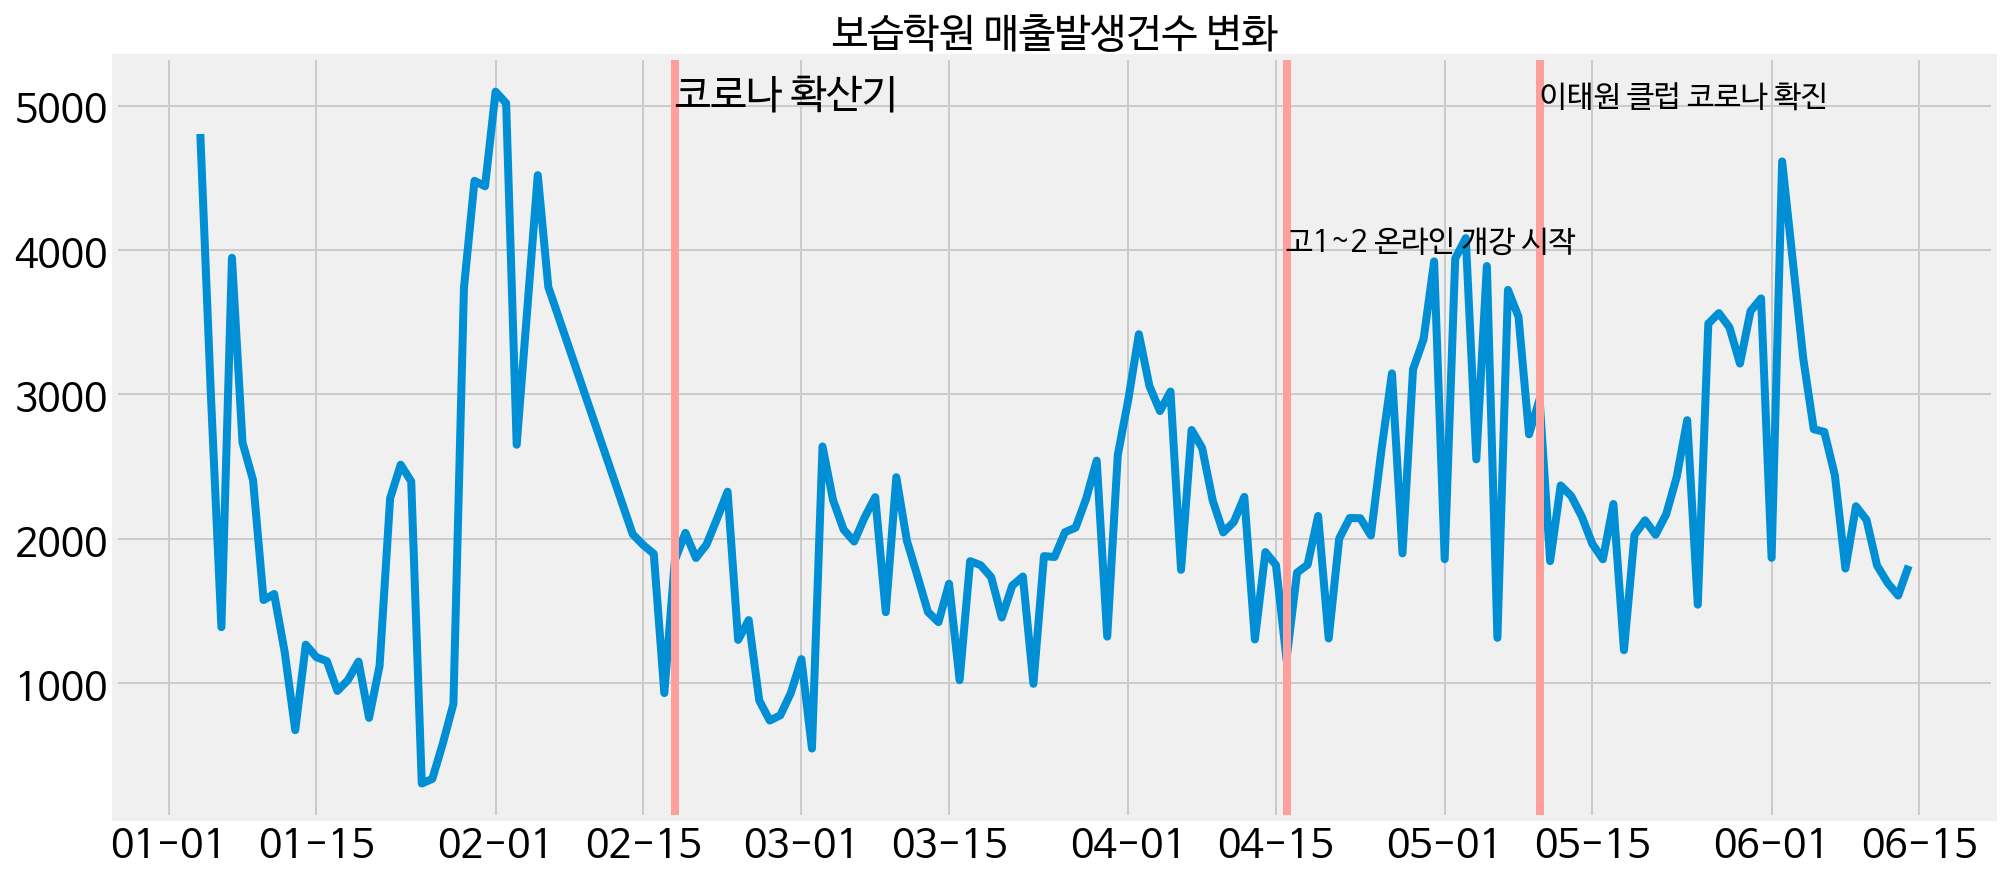

In [ ]:
#보습학원
card_academy=card.loc[card['induty_name']=="보습학원",:]
card_academy=card_academy[['date','cost','cnt']]
card_academy['cnt']=pd.to_numeric(card_academy['cnt'])
card_academy=card_academy.groupby('date')['cnt'].sum().to_frame().reset_index()

#그래프 그리기
plt.rcParams['figure.figsize'] = (15,7)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.xaxis.set_major_locator(mdates.AutoDateLocator(minticks = 12, maxticks = 14))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.title("보습학원 매출발생건수 변화", fontsize = 20)
plt.plot(card_academy['date'],card_academy['cnt'])
plt.axvline(datetime.datetime(2020,2,18), color='r')
plt.text(datetime.datetime(2020,2,18), 5000, '코로나 확산기', fontsize=20)
plt.axvline(datetime.datetime(2020,5,10), color='r')
plt.text(datetime.datetime(2020,5,10), 5000, '이태원 클럽 코로나 확진', fontsize=15)
plt.axvline(datetime.datetime(2020,4,16), color='r')
plt.text(datetime.datetime(2020,4,16), 4000, '고1~2 온라인 개강 시작', fontsize=15)
plt.show()

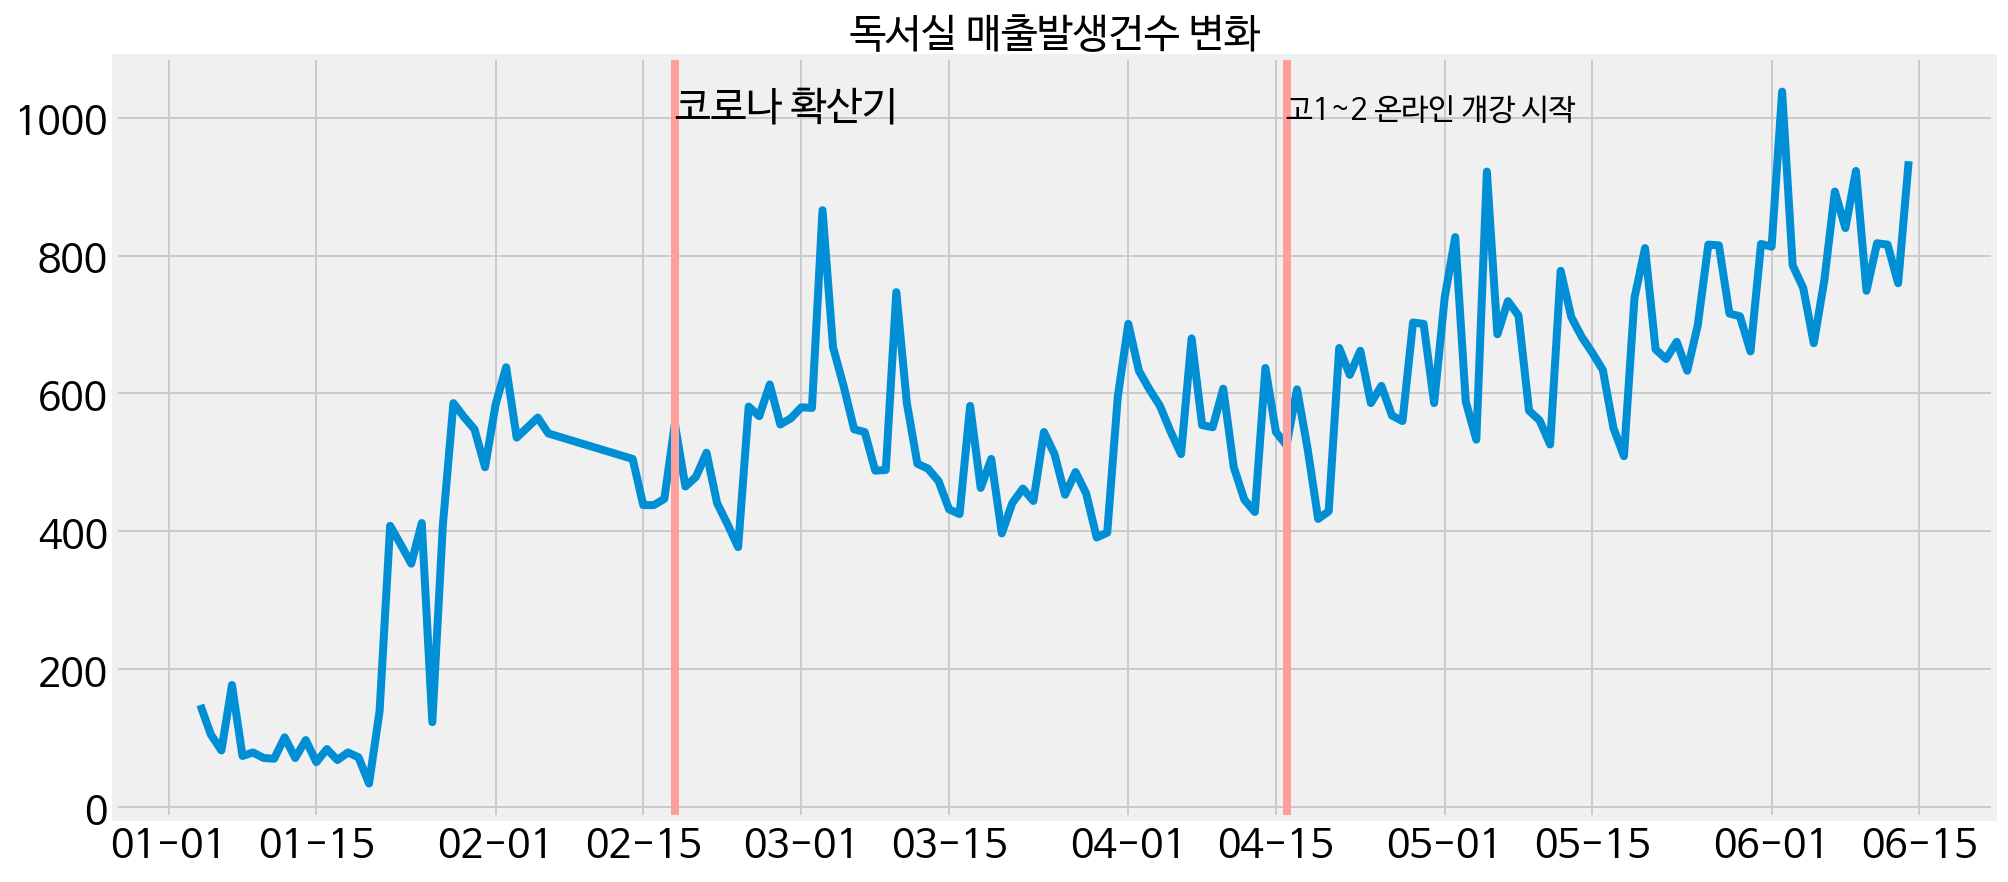

In [ ]:
#독서실
card_book=card.loc[card['induty_name']=="독서실",:]
card_book=card_book[['date','cost','cnt']]
card_book['cnt']=pd.to_numeric(card_book['cnt'])
card_book=card_book.groupby('date')['cnt'].sum().to_frame().reset_index()

#요일별로 확인하기
plt.rcParams['figure.figsize'] = (15,7)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.xaxis.set_major_locator(mdates.AutoDateLocator(minticks = 12, maxticks = 14))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.title("독서실 매출발생건수 변화", fontsize = 20)
plt.plot(card_book['date'],card_book['cnt'])
plt.axvline(datetime.datetime(2020,2,18), color='r')
plt.text(datetime.datetime(2020,2,18), 1000, '코로나 확산기', fontsize=20)
plt.axvline(datetime.datetime(2020,4,16), color='r')
plt.text(datetime.datetime(2020,4,16), 1000, '고1~2 온라인 개강 시작', fontsize=15)
plt.show()

보습학원의 경우 코로나 확산기에 접어들어 cnt가 상당히 많이 줄어들었음을 확인할 수 있으나, 4월 9일 고3 온라인 개강 이후 4월 16일 고1~2를 포함한 대부분 학생들이 온라인 강좌를 듣자 다시 cnt가 증가하는 모습을 보여준다. 

이후, 이태원 클럽을 비롯한 대면 수업이 활성화 된 6월 이후 다시 cnt가 줄어드는 면모가 보인다.
반면, 독서실은 코로나 확산기 이후에도 꾸준한 cnt를 보여주며, 온라인 개강이 시작되자 오히려 더 증가하는 못습을 보여준다.

---



위의 그래프 중, 사람간의 접촉이 상대적으로 적은 약국, 편의점, 독서실과 같은 경우 cnt가 유지되거나 오히려 증가하는 모습을 보여주나, 접촉이 상대적으로 많은 주점, 노래방, 보습학원, 영화관은 cnt가 상당히 감소하는 모습을 보여준다.

예외적으로 스포츠레져용품은 증가하는 모습을 보여준다.